### **Data Cleaning and Exploratory Analysis**

#### **Import libraries**

In [1]:
# Import the custom function 'gera_dados' from the local module 'gerar_dados_aleatorios'
from modules.generae_random_sales_data import GenerateData as gd

from matplotlib.ticker import FuncFormatter

# Import date and time utilities for handling timestamps and time intervals
from datetime import datetime, timedelta

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import data manipulation and numerical computation libraries
import pandas as pd
import numpy as np

# Import the 'random' module for generating random numbers
import random

#### **Create functions**

In [2]:
def format_millions(x, pos):
    """
    Format monetary values in millions with 'R$' and 'Mi' suffix.
    Example: 12500000 -> R$ 12.50 Mi
    """
    return f'R$ {x / 1_000_000:.2f} Mi'


def format_number(x, pos):
    """
    Format numbers with thousand separators (Brazilian format).
    Example: 1250000 -> 1.250.000
    """
    return f'{int(x):,}'.replace(',', '.')


def format_percentage_values(pct, data):
    """
    Format percentages for pie charts, showing both percent and absolute value.
    Example: 25% (12.500)
    """
    total = sum(data)
    absolute = int(round(pct * total / 100.0))
    formatted_value = f'{absolute:,}'.replace(',', '.')
    return f'{pct:.1f}%\n({formatted_value})'


# Generic chart function
def create_chart(data, title, xlabel='', ylabel='', chart_type='bar', monetary=False):
    """
    Creates a customizable chart (bar, barh, line, or pie) with formatted labels.
    
    Parameters:
        data (pd.Series or pd.DataFrame): Data to plot
        title (str): Chart title
        xlabel (str): X-axis label
        ylabel (str): Y-axis label
        chart_type (str): Type of chart ('bar', 'barh', 'line', 'pie')
        monetary (bool): Whether to format numbers as currency (True) or plain numbers (False)
    """

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = sns.color_palette("coolwarm", len(data))

    # Choose the right formatter
    formatter = FuncFormatter(format_millions if monetary else format_number)

    # --- Bar Chart ---
    if chart_type == 'bar':
        data.plot(kind='bar', color=colors, ax=ax)
        ax.yaxis.set_major_formatter(formatter)
        plt.xticks(rotation=0)
        ax.grid(False)
        
        # Add value labels
        for i, v in enumerate(data):
            label = f'R$ {v / 1_000_000:.2f} Mi' if monetary else f'{int(v):,}'.replace(',', '.')
            ax.text(i, v + (v * 0.01), label, ha='center', va='bottom', fontsize=10, color='black')

    # --- Horizontal Bar Chart ---
    elif chart_type == 'barh':
        data.sort_values(ascending=True).plot(kind='barh', color=colors, ax=ax)
        ax.xaxis.set_major_formatter(formatter)
        
        for i, v in enumerate(data.sort_values(ascending=True)):
            label = f'R$ {v / 1_000_000:.2f} Mi' if monetary else f'{int(v):,}'.replace(',', '.')
            ax.text(v + (v * 0.01), i, label, va='center', fontsize=9, color='black')

    # --- Line Chart ---
    elif chart_type == 'line':
        data.plot(kind='line', marker='o', color='green', ax=ax)
        ax.yaxis.set_major_formatter(formatter)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        for i, v in enumerate(data):
            label = f'R$ {v / 1_000_000:.2f} Mi' if monetary else f'{int(v):,}'.replace(',', '.')
            ax.text(i, v + (max(data) * 0.02), label, ha='center', va='bottom', fontsize=9, color='black')

    # --- Pie Chart ---
    elif chart_type == 'pie':
        colors = sns.color_palette("Set3", len(data))
        data.plot(
            kind='pie',
            colors=colors,
            autopct=lambda pct: format_percentage_values(pct, data),
            startangle=90,
            wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
            ax=ax
        )
        ax.set_ylabel('')

    # Titles and labels
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()

    return fig, ax

In [3]:
# Function to format a numeric value as Brazilian Real currency
# Example: 1234567.89 -> 'R$ 1,234,567.89'
def format_brl(value):
    return f'R$ {value:,.2f}'

#### **Create a random dataset**

In [4]:
# Create a random dataFrame
df_sales = gd.generate_fake_data()


Starting the generation of 600 records...
Data generation completed successfully.



#### **Exploratory Data Analysis**

In [5]:
# Check the first 5 records
df_sales.head()

,Order_ID,Order_Date,Product_Name,Category,Unit_Price,Quantity,Customer_ID,City,State
0,1000,2026-01-01 19:00:00,Gaming Laptop,Electronics,7500.00,7,110,Belo Horizonte,MG
1,1001,2026-01-01 21:00:00,Gaming Laptop,Electronics,7500.00,7,114,Curitiba,PR
2,1002,2026-01-01 01:00:00,Graphics Card,Hardware,4500.00,6,103,Curitiba,PR
3,1003,2026-01-01 21:00:00,Mechanical Keyboard,Accessories,538.59,6,107,Porto Alegre,RS
4,1004,2026-01-01 22:00:00,Graphics Card,Hardware,4500.00,4,140,Salvador,BA


In [6]:
# Show how much lines and coluns the DataFrame has
df_sales.shape

(600, 9)

In [7]:
# Show important information (null, data type)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_ID      600 non-null    int64         
 1   Order_Date    600 non-null    datetime64[ns]
 2   Product_Name  600 non-null    object        
 3   Category      600 non-null    object        
 4   Unit_Price    600 non-null    float64       
 5   Quantity      600 non-null    int64         
 6   Customer_ID   600 non-null    int64         
 7   City          600 non-null    object        
 8   State         600 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 42.3+ KB


In [8]:
# Show statistics summary (mantain just important columns)
df_sales[['Unit_Price', 'Quantity']].describe()

,Unit_Price,Quantity
count,600.000000,600.000000
mean,2510.577817,3.933333
std,2529.135318,2.002225
min,225.390000,1.000000
25%,547.390000,2.000000
50%,1200.000000,4.000000
75%,4500.000000,6.000000
max,7500.000000,7.000000


In [9]:
# Show duplicate values
df_sales.duplicated().sum()

np.int64(0)

In [10]:
# Convert date columns to datetime type
df_sales['Order_Date'] = pd.to_datetime(df_sales['Order_Date'])

### **Addressing business-related questions**

#### What are the top 10 best-selling products?

In [11]:
# Groups the sales data by product name and sums up the total quantity sold for each product
top_10_products_by_quantity = df_sales.groupby(
    'Product_Name'
)['Quantity'].sum().sort_values(ascending = False)

In [12]:
# Converts the result into a DataFrame for easier visualization and analysis
pd.DataFrame(top_10_products_by_quantity)

,Quantity
Product_Name,
Graphics Card,360
Vertical Mouse,342
Gaming Laptop,338
Headset 7.1,312
Mechanical Keyboard,282
Ultrawide Monitor,266
Gaming Chair,249
SSD 1TB,211


#### What was the revenue for the month?

In [13]:
# Create a month/year column at the DataFrame
df_sales['Month_Year'] = df_sales['Order_Date'].dt.strftime('%b-%Y')

In [14]:
# Create a column containing the revenue amount
df_sales['revenue_Amount'] =  df_sales['Unit_Price'] * df_sales['Quantity']

In [15]:
# Group the sales data by month-year and sums up the total revenue amount
total_revenue_by_month =  df_sales.groupby('Month_Year')['revenue_Amount'].sum().sort_values(ascending = False)

In [16]:
# Converts the result into a DataFrame for easier visualization and analysis
df_display = pd.DataFrame(total_revenue_by_month)

df_display['revenue_Amount'] = df_display['revenue_Amount'].apply(format_brl)

df_display

,revenue_Amount
Month_Year,
Jan-2026,"R$ 1,608,226.80"
Apr-2026,"R$ 1,581,867.76"
Mar-2026,"R$ 1,478,355.57"
Feb-2026,"R$ 1,134,665.54"


#### What is the total sales by state?

In [17]:
# Group the sales data by state and sums up the total revenue amount
total_revenue_by_state = df_sales.groupby('State')['revenue_Amount'].sum().sort_values(ascending = False)

In [18]:
# Converts the result into a DataFrame for easier visualization and analysis
df_display = pd.DataFrame(total_revenue_by_state)

df_display['revenue_Amount'] = df_display['revenue_Amount'].apply(format_brl)

df_display

,revenue_Amount
State,
MG,"R$ 970,504.57"
RS,"R$ 951,087.94"
SP,"R$ 887,157.25"
PR,"R$ 808,587.44"
BA,"R$ 798,533.47"
RJ,"R$ 742,787.48"
CE,"R$ 644,457.52"


#### What is the revenue per category?

In [19]:
total_revenue_by_category = df_sales.groupby('Category')['revenue_Amount'].sum().sort_values(ascending = False)

In [20]:
df_display = pd.DataFrame(total_revenue_by_category)

df_display['revenue_Amount'] = df_display['revenue_Amount'].apply(format_brl)

df_display

,revenue_Amount
Category,
Electronics,"R$ 3,279,800.00"
Hardware,"R$ 1,746,600.00"
Accessories,"R$ 477,915.67"
Furniture,"R$ 298,800.00"


### Visualizations for Business Insights

Top 10 best selling products

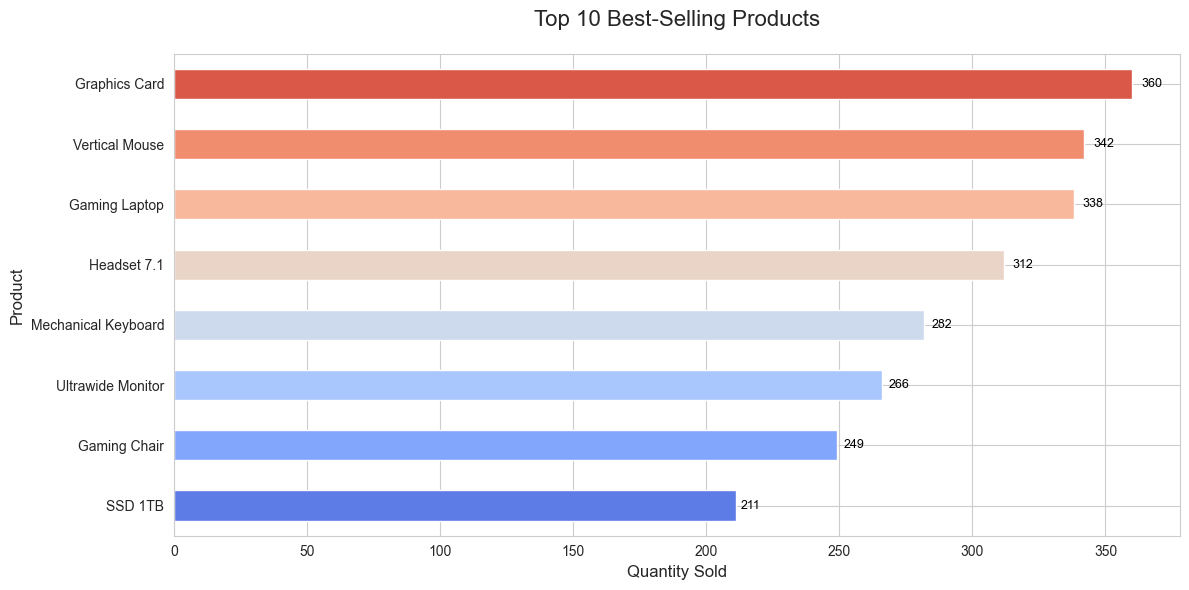

In [21]:
fig, ax = create_chart(top_10_products_by_quantity, 'Top 10 Best-Selling Products', 'Quantity Sold', 'Product', 'barh')

Total revenue by month

In [22]:
total_revenue_by_month = total_revenue_by_month.iloc[pd.to_datetime(total_revenue_by_month.index, format='%b-%Y').argsort()]

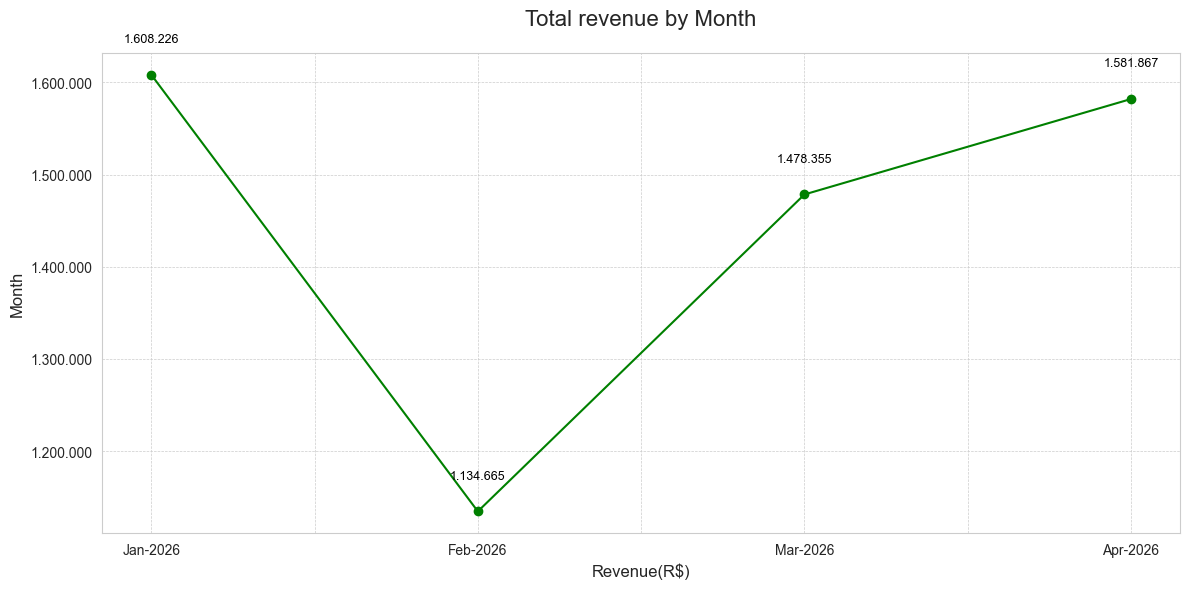

In [23]:
fig, ax = create_chart(total_revenue_by_month, 'Total revenue by Month', 'Revenue(R$)', 'Month', 'line')

Total revenue by state

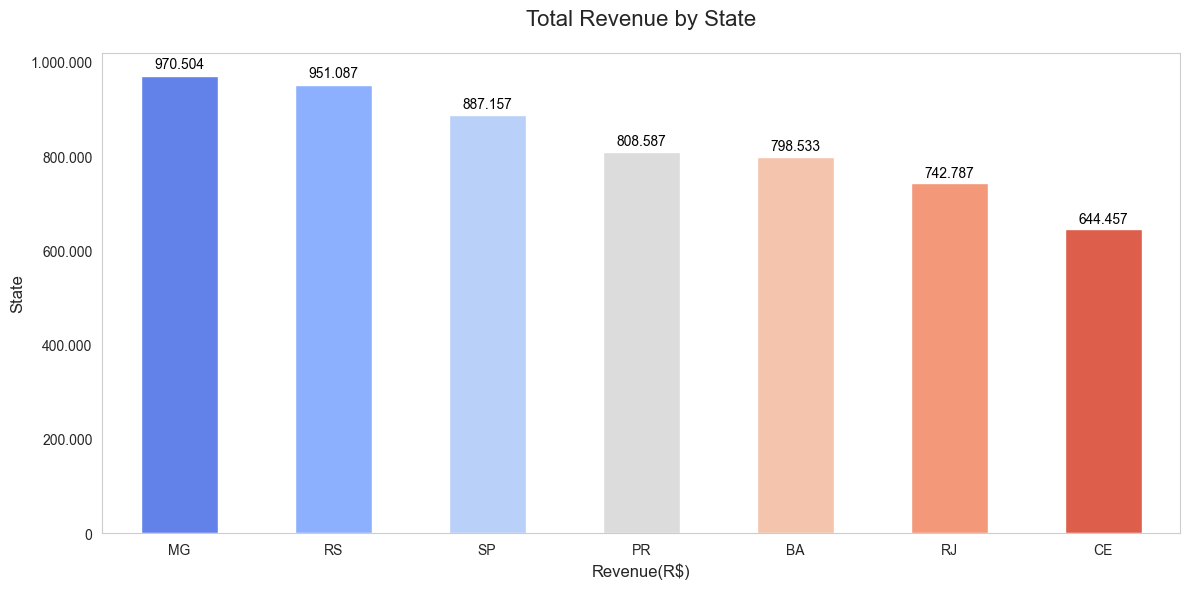

In [24]:
fig, ax = create_chart(total_revenue_by_state, 'Total Revenue by State', 'Revenue(R$)', 'State', 'bar')

Total revenue by category

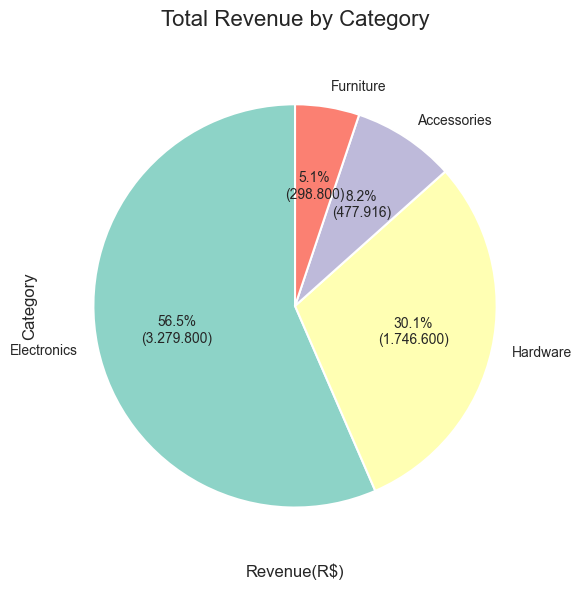

In [25]:
fig, ax = create_chart(total_revenue_by_category, 'Total Revenue by Category', 'Revenue(R$)', 'Category', 'pie')